# In the Name of God
Mohammad Hossein Ataie SID: 810197632

# Part 1

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [221]:
dataset = pd.read_csv("FuelConsumptionCo2.CSV",converters = {"tokens":lambda tokenList : tokenList [1:].split(",")})

# DataFrame.head(n)
This function returns the first n rows for the object based on position.

In [4]:
dataset.head(1)

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196.0


# DataFrame.tail(n)
This function returns last n rows from the object based on position.

In [5]:
dataset.tail(1)

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1066,1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,14.9,10.2,12.8,22,294.0


# DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In [6]:
dataDisc = dataset.describe()
dataDisc

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1040.000000,1033.000000,1067.000000,1067.000000,1067.000000,1067.000000,964.000000
mean,533.000000,2014.0,3.324038,5.797677,13.296532,9.474602,11.580881,26.441425,256.741701
std,308.160672,0.0,1.411400,1.807262,4.101253,2.794510,3.485595,7.468702,63.265308
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,209.000000
50%,533.000000,2014.0,3.300000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.200000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


# Part 2

# DataFrame.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None, null_counts=None)
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1058 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1040 non-null   float64
 6   CYLINDERS                 1033 non-null   float64
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  996 non-null    object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              964 non-null    float64
dtypes: float

In [8]:
obj_df = dataset.select_dtypes(include=['object']).copy()
obj_df.head()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


In [9]:
obj_df["MAKE"] = obj_df["MAKE"].astype('category')
obj_df["MODEL"] = obj_df["MODEL"].astype('category')
obj_df["VEHICLECLASS"] = obj_df["VEHICLECLASS"].astype('category')
obj_df["TRANSMISSION"] = obj_df["TRANSMISSION"].astype('category')
obj_df["FUELTYPE"] = obj_df["FUELTYPE"].astype('category')

In [10]:
obj_df["MAKE_cat"] = obj_df["MAKE"].cat.codes
obj_df["MODEL_cat"] = obj_df["MODEL"].cat.codes
obj_df["VEHICLECLASS_cat"] = obj_df["VEHICLECLASS"].cat.codes
obj_df["TRANSMISSION_cat"] = obj_df["TRANSMISSION"].cat.codes
obj_df["FUELTYPE_cat"] = obj_df["FUELTYPE"].cat.codes
obj_df.dtypes

MAKE                category
MODEL               category
VEHICLECLASS        category
TRANSMISSION        category
FUELTYPE            category
MAKE_cat                int8
MODEL_cat              int16
VEHICLECLASS_cat        int8
TRANSMISSION_cat        int8
FUELTYPE_cat            int8
dtype: object

The nice aspect of this approach is that you get the benefits of pandas categories (compact data size, ability to order, plotting support) but can easily be converted to numeric values for further analysis.

# Part 3

In [11]:
count = dataset["MODELYEAR"].isna().sum()
print("Number of 'Nan' in MODELYEAR:", count)
count = dataset["MAKE"].isna().sum()
print("Number of 'Nan' in MAKE:", count)
count = dataset["MODEL"].isna().sum()
print("Number of 'Nan' in MODEL:", count)
count = dataset["VEHICLECLASS"].isna().sum()
print("Number of 'Nan' in VEHICLECLASS:", count)
count = dataset["ENGINESIZE"].isna().sum()
print("Number of 'Nan' in ENGINESIZE:", count)
count = dataset["CYLINDERS"].isna().sum()
print("Number of 'Nan' in CYLINDERS:", count)
count = dataset["TRANSMISSION"].isna().sum()
print("Number of 'Nan' in TRANSMISSION:", count)
count = dataset["FUELTYPE"].isna().sum()
print("Number of 'Nan' in FUELTYPE:", count)
count = dataset["FUELCONSUMPTION_CITY"].isna().sum()
print("Number of 'Nan' in FUELCONSUMPTION_CITY:", count)
count = dataset["FUELCONSUMPTION_HWY"].isna().sum()
print("Number of 'Nan' in FUELCONSUMPTION_HWY:", count)
count = dataset["FUELCONSUMPTION_COMB_MPG"].isna().sum()
print("Number of 'Nan' in FUELCONSUMPTION_COMB_MPG:", count)
count = dataset["CO2EMISSIONS"].isna().sum()
print("Number of 'Nan' in CO2EMISSIONS:", count)

Number of 'Nan' in MODELYEAR: 0
Number of 'Nan' in MAKE: 0
Number of 'Nan' in MODEL: 9
Number of 'Nan' in VEHICLECLASS: 0
Number of 'Nan' in ENGINESIZE: 27
Number of 'Nan' in CYLINDERS: 34
Number of 'Nan' in TRANSMISSION: 0
Number of 'Nan' in FUELTYPE: 71
Number of 'Nan' in FUELCONSUMPTION_CITY: 0
Number of 'Nan' in FUELCONSUMPTION_HWY: 0
Number of 'Nan' in FUELCONSUMPTION_COMB_MPG: 0
Number of 'Nan' in CO2EMISSIONS: 103


In [12]:
dataset.isna().sum()

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                     71
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

In [125]:
column_means = dataset.mean()
df = dataset.fillna(column_means)
df["CO2EMISSIONS"] = dataset["CO2EMISSIONS"]
len(df)

1067

In [143]:
test = dataset[dataset["CO2EMISSIONS"].isnull()]
print(len(test))
train = dataset[dataset['CO2EMISSIONS'].notna()]
print(len(train))

103
964


*** Dropping the columns that have Nan Values has an advantage like quick and simpler process.
it also has disadvantages like a significant loss of data (about 40%)

*** Filling the null values with the mean of a particular column makes no significant loss of data (about 0.1%)

Disadvantages of this method are Inaccuracy- which will hamper the process of analysis and prediction
For a particular category, all null values present for a column.
For example, on a health questionnaire, heavier respondents may be less willing to disclose their weight. The mean of the observed values would be lower than the true mean for all respondents, and you'd be using that value in place of values that should actually be considerably higher.
Using the mean is less of an issue if the reason the values are missing is independent of the missing values themselves.

# Part 4

In [228]:
start_time_vectorization = time.time()
s1 = dataset[dataset["CO2EMISSIONS"] < 240].mean()
end_time_vectorization = time.time() - start_time_vectorization
s1

Unnamed: 0                   571.334107
MODELYEAR                   2014.000000
ENGINESIZE                     2.188941
CYLINDERS                      4.331731
FUELCONSUMPTION_CITY          10.037819
FUELCONSUMPTION_HWY            7.350116
FUELCONSUMPTION_COMB           8.832251
FUELCONSUMPTION_COMB_MPG      32.800464
CO2EMISSIONS                 201.122970
dtype: float64

In [223]:
dataset[dataset["CO2EMISSIONS"] > 300].mean()

Unnamed: 0                   447.925581
MODELYEAR                   2014.000000
ENGINESIZE                     5.248039
CYLINDERS                      8.172249
FUELCONSUMPTION_CITY          18.663256
FUELCONSUMPTION_HWY           13.152558
FUELCONSUMPTION_COMB          16.188372
FUELCONSUMPTION_COMB_MPG      17.869767
CO2EMISSIONS                 348.902326
dtype: float64

# Part 5

In [224]:
newDs = dataset["CO2EMISSIONS"].dropna()
newDs

0       196.0
1       221.0
2       136.0
4       244.0
5       230.0
        ...  
1062    271.0
1063    264.0
1064    271.0
1065    260.0
1066    294.0
Name: CO2EMISSIONS, Length: 964, dtype: float64

In [229]:
start_time_forloop = time.time()
count = temp = 0
for column in dataset[['CO2EMISSIONS']]:
    columnSeriesObj = dataset[column]
    columnSeriesObj = columnSeriesObj
    for i in range(len(dataset)):
        if (np.isnan(columnSeriesObj.values[i]) == False):
            if int(columnSeriesObj.values[i]) < 240:
                count += 1
                temp += dataset["FUELCONSUMPTION_CITY"][i]
print(temp/count)
end_time_forloop = time.time() - start_time_forloop

10.037819025522042


In [230]:
count = temp = 0
for column in dataset[['CO2EMISSIONS']]:
    columnSeriesObj = dataset[column]
    columnSeriesObj = columnSeriesObj
    for i in range(len(dataset)):
        if (np.isnan(columnSeriesObj.values[i]) == False):
            if int(columnSeriesObj.values[i]) > 300:
                count += 1
                temp += dataset["FUELCONSUMPTION_CITY"][i]
print(temp/count)

18.663255813953487


In [234]:
print("elapsed time in vectorization:" , end_time_vectorization)
print("elapsed time in for-loop:     " , end_time_forloop)

elapsed time in vectorization: 0.0020055770874023438
elapsed time in for-loop:      0.006168365478515625


As you can see, the execution time of the program in vectorization mode is one-third of the time we use for-loop.

# Part6

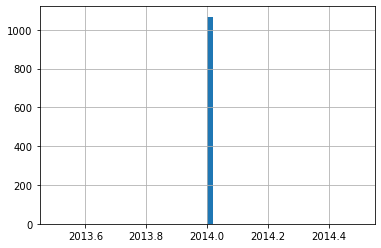

In [149]:
hist = dataset["MODELYEAR"].hist(bins = 50)

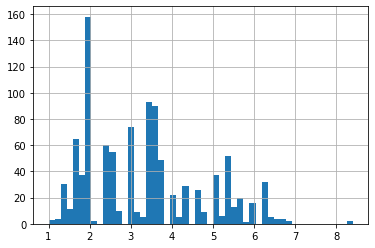

In [150]:
hist = dataset["ENGINESIZE"].hist(bins = 50)

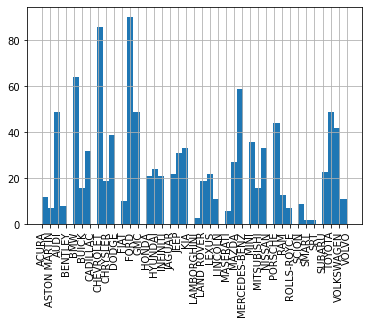

In [151]:
plt.xticks(rotation=90)
hist = dataset["MAKE"].hist(bins = 50)

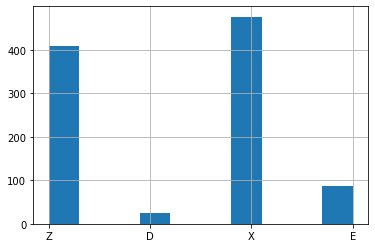

In [152]:
hist = dataset["FUELTYPE"].hist(bins = 10)

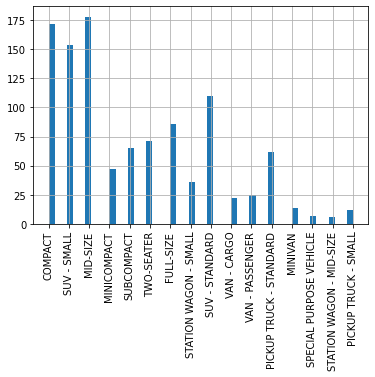

In [153]:
plt.xticks(rotation=90)
hist = dataset["VEHICLECLASS"].hist(bins = 50)

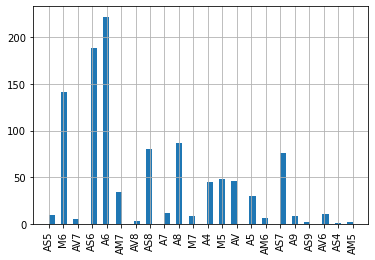

In [154]:
plt.xticks(rotation=90)
hist = dataset["TRANSMISSION"].hist(bins = 50)

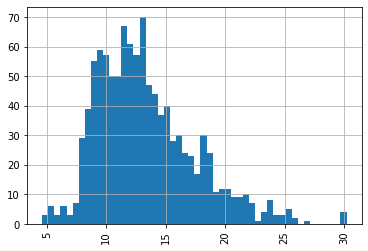

In [236]:
plt.xticks(rotation=90)
hist = dataset["FUELCONSUMPTION_CITY"].hist(bins = 50)

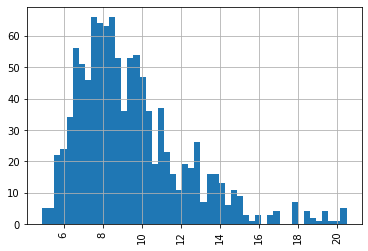

In [237]:
plt.xticks(rotation=90)
hist = dataset["FUELCONSUMPTION_HWY"].hist(bins = 50)

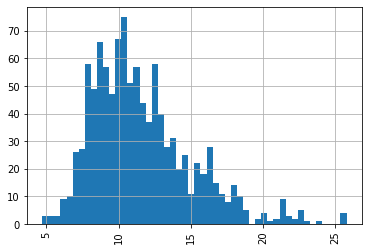

In [238]:
plt.xticks(rotation=90)
hist = dataset["FUELCONSUMPTION_COMB"].hist(bins = 50)

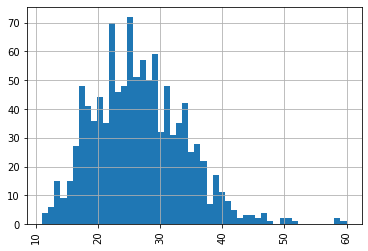

In [240]:
plt.xticks(rotation=90)
hist = dataset["FUELCONSUMPTION_COMB_MPG"].hist(bins = 50)

# Part7

In [271]:
normalized_df =(train - train.mean())/train.std()
print(train["CO2EMISSIONS"].mean())
print(train["CO2EMISSIONS"].std())
normalized_df

256.74170124481327
63.26530765153163


,CO2EMISSIONS,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_HWY,FUELTYPE,MAKE,MODEL,MODELYEAR,TRANSMISSION,Unnamed: 0,VEHICLECLASS
0,-0.960111,-1.008447,-0.960777,-0.833605,-0.888216,0.886286,-0.994870,NaN,NaN,NaN,NaN,NaN,-1.727000,NaN
1,-0.564949,-1.008447,-0.674838,-0.519842,-0.576247,0.352882,-0.641939,NaN,NaN,NaN,NaN,NaN,-1.723743,NaN
2,-1.908498,-1.008447,-1.318201,-1.774893,-1.625596,2.886552,-1.312508,NaN,NaN,NaN,NaN,NaN,-1.720487,NaN
4,-0.201401,0.098356,0.111495,-0.302621,-0.292640,0.086180,-0.289008,NaN,NaN,NaN,NaN,NaN,-1.713973,NaN
5,-0.422691,0.098356,0.111495,-0.350893,-0.462804,0.219531,-0.641939,NaN,NaN,NaN,NaN,NaN,-1.710717,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0.225373,0.098356,-0.245929,0.011141,0.047690,-0.313873,0.099216,NaN,NaN,NaN,NaN,NaN,1.731594,NaN
1063,0.114728,0.098356,-0.102959,-0.037130,-0.037393,-0.180522,-0.006663,NaN,NaN,NaN,NaN,NaN,1.734851,NaN
1064,0.225373,0.098356,-0.245929,0.011141,0.047690,-0.313873,0.099216,NaN,NaN,NaN,NaN,NaN,1.738108,NaN
1065,0.051502,0.098356,-0.102959,-0.109537,-0.094114,-0.180522,-0.077249,NaN,NaN,NaN,NaN,NaN,1.741365,NaN


# Part8_A)

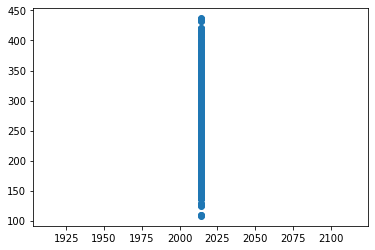

In [156]:
x = np.array(train["MODELYEAR"])
y = np.array(train["CO2EMISSIONS"])
plt.scatter(x, y, cmap = 'viridis')
plt.show()

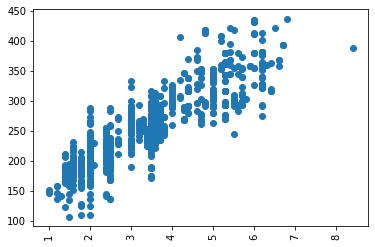

In [157]:
plt.xticks(rotation=90)
x = np.array(train["ENGINESIZE"])
y = np.array(train["CO2EMISSIONS"])
plt.scatter(x, y, cmap = 'viridis')
plt.show()

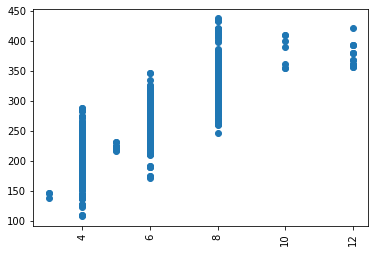

In [158]:
plt.xticks(rotation=90)
x = np.array(train["CYLINDERS"])
y = np.array(train["CO2EMISSIONS"])
plt.scatter(x, y, cmap = 'viridis')
plt.show()

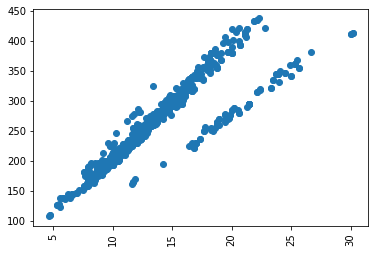

In [159]:
plt.xticks(rotation=90)
x = np.array(train["FUELCONSUMPTION_CITY"])
y = np.array(train["CO2EMISSIONS"])
plt.scatter(x, y, cmap = 'viridis')
plt.show()

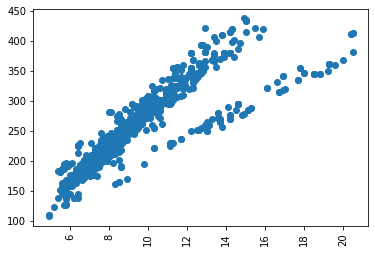

In [160]:
plt.xticks(rotation=90)
x = np.array(train["FUELCONSUMPTION_HWY"])
y = np.array(train["CO2EMISSIONS"])
plt.scatter(x, y, cmap = 'viridis')
plt.show()

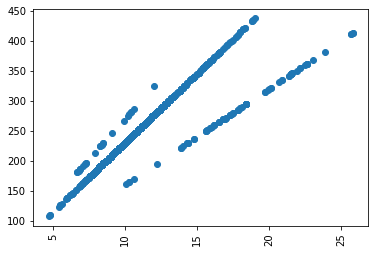

In [161]:
plt.xticks(rotation=90)
x = np.array(train["FUELCONSUMPTION_COMB"])
y = np.array(train["CO2EMISSIONS"])
plt.scatter(x, y, cmap = 'viridis')
plt.show()

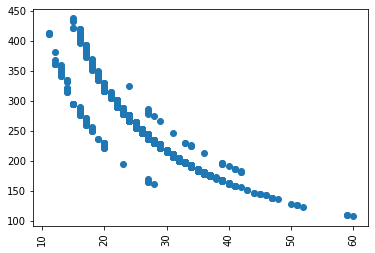

In [162]:
plt.xticks(rotation=90)
x = np.array(train["FUELCONSUMPTION_COMB_MPG"])
y = np.array(train["CO2EMISSIONS"])
plt.scatter(x, y, cmap = 'viridis')
plt.show()

# Part8_B)

As we studied in Statistics and Probability, When the "Y" variable tends to increase as the "x" variable increases, we say there is a positive correlation between the variables.
The strongest linear relationship occurs when the slope is 1.  This means that 
when one variable increases by one, the other variable also increases by the 
same amount.  This line is at a 45 degree angle. 
FUELCONSUMPTION_COMB seems have the most linear correlation compare to others.

# Part 9

In [203]:
x_ = np.matrix([np.ones(len(normalized_df["CO2EMISSIONS"])),normalized_df["CO2EMISSIONS"]]).T
y_ = np.matrix(normalized_df["FUELCONSUMPTION_COMB"]).T

Martix X:

In [204]:
x_

matrix([[ 1.        , -0.96011074],
        [ 1.        , -0.56494946],
        [ 1.        , -1.90849781],
        ...,
        [ 1.        ,  0.2253731 ],
        [ 1.        ,  0.05150214],
        [ 1.        ,  0.58892148]])

In [205]:
fn = np.linalg.inv(x_.T.dot(x_)).dot(x_.T).dot(y_)

In [206]:
fn

matrix([[-1.89892589e-15],
        [ 8.88687103e-01]])

In [211]:
Y_true = normalized_df["CO2EMISSIONS"]
Y_pred = float(fn[1])* normalized_df["FUELCONSUMPTION_COMB"] + float(fn[0])
MSE = np.square(np.subtract(Y_true,Y_pred)).mean()

In [212]:
MSE

0.2100171470129469

# Part 11

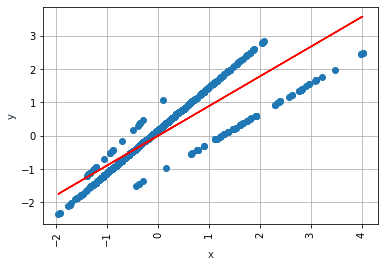

In [218]:
plt.xticks(rotation=90)
x = np.array(normalized_df["FUELCONSUMPTION_COMB"])
y = np.array(normalized_df["CO2EMISSIONS"])
plt.plot(x, y, "o")
y__ = float(fn[1])* x + float(fn[0])
plt.plot(x, y__, '-r')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.grid()
plt.show()

The 
points on the scatterplot closely 
resemble a straight line.  A 
relationship is linear if one 
variable increases by 
approximately the same rate as the 
other variables changes by one 
unit.
Another important component to a scatterplot is the strength of the 
relationship between the two variables.  
The slope provides information on the strength of the relationship.
The correlation coefficient is based on means and standard deviations, so it is 
not robust to outliers; it is strongly affected by extreme observations.  These 
individuals are sometimes referred to as influential observations because 
they have a strong impact on the correlation coefficient

# Part 12

In [272]:
test["FUELCONSUMPTION_COMB"] = (test["FUELCONSUMPTION_COMB"] - test["FUELCONSUMPTION_COMB"].mean())/test["FUELCONSUMPTION_COMB"].std()
co2norm =  float(fn[1])* test["FUELCONSUMPTION_COMB"] + float(fn[0])
co2norm = (co2norm *  train["CO2EMISSIONS"].std()) + train["CO2EMISSIONS"].mean()
co2norm

3       256.670256
20      236.433392
30      258.509971
42      295.304270
43      252.990826
           ...    
1022    225.395102
1027    232.753962
1051    249.311396
1052    265.868831
1053    249.311396
Name: FUELCONSUMPTION_COMB, Length: 103, dtype: float64

In [273]:
co2norm.to_csv('myfile.csv')